In [14]:
import pandas as pd
import numpy as np
%matplotlib inline

In [15]:
sleep_data=pd.read_csv('sleepdata.csv',sep=';') 
display(sleep_data.head())

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0


In [16]:
display(sleep_data.shape)
display(sleep_data.isnull().sum(axis = 0))

(887, 8)

Start                 0
End                   0
Sleep quality         0
Time in bed           0
Wake up             641
Sleep Notes         235
Heart rate          725
Activity (steps)      0
dtype: int64

In [17]:
#here we replace nan values for heart rate mean
sleep_data['HR']=sleep_data['Heart rate'].replace(np.nan,sleep_data['Heart rate'].mean())
display(sleep_data.head())
#here we drop all rows that contain nan values
test2=sleep_data.dropna().reset_index()
display(test2.head())
#notice we lost almost all rows
display(test2.shape)

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),HR
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0,59.000000
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0,72.000000
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0,57.000000
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0,60.604938
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0,68.000000


,index,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),HR
0,1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0,72.0
1,4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0,68.0
2,5,2015-01-03 00:34:57,2015-01-03 07:47:23,83%,7:12,:),Drank coffee:Drank tea,60.0,0,60.0
3,7,2015-01-04 21:34:44,2015-01-05 04:53:34,78%,7:18,:),Ate late:Drank coffee,57.0,0,57.0
4,8,2015-01-05 21:32:25,2015-01-06 05:00:03,69%,7:27,:),Drank coffee:Drank tea:Worked out,56.0,0,56.0


(155, 10)

In [18]:
display(sleep_data['Wake up'].unique())
display(sleep_data['Sleep Notes'].unique())
#notes=['Stressful day','Drank coffee','Drank tea','Worked out','Ate late']

array([':)', ':|', nan, ':('], dtype=object)

array([nan, 'Stressful day', 'Drank coffee:Drank tea', 'Drank tea',
       'Ate late:Drank coffee', 'Drank coffee:Drank tea:Worked out',
       'Drank tea:Worked out', 'Drank coffee:Drank tea:Stressful day',
       'Drank coffee', 'Drank coffee:Drank tea:Stressful day:Worked out',
       'Drank coffee:Worked out', 'Ate late:Drank coffee:Drank tea',
       'Ate late:Drank coffee:Drank tea:Worked out',
       'Drank tea:Stressful day', 'Drank tea:Stressful day:Worked out',
       'Drank coffee:Stressful day:Worked out',
       'Drank coffee:Stressful day',
       'Ate late:Drank coffee:Drank tea:Stressful day', 'Worked out',
       'Ate late:Drank coffee:Worked out'], dtype=object)

In [19]:
display(sleep_data.dtypes)
display(sleep_data.describe())

Start                object
End                  object
Sleep quality        object
Time in bed          object
Wake up              object
Sleep Notes          object
Heart rate          float64
Activity (steps)      int64
HR                  float64
dtype: object

,Heart rate,Activity (steps),HR
count,162.000000,887.000000,887.000000
mean,60.604938,2776.378805,60.604938
std,7.102933,3486.482157,3.027846
min,49.000000,0.000000,49.000000
25%,57.000000,0.000000,60.604938
50%,60.000000,255.000000,60.604938
75%,64.000000,5317.000000,60.604938
max,98.000000,21870.000000,98.000000


In [20]:
sleep_data=sleep_data.drop(columns=['Wake up','Sleep Notes','Heart rate'])

In [21]:
display(sleep_data.head())

,Start,End,Sleep quality,Time in bed,Activity (steps),HR
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,0,59.000000
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,0,72.000000
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,0,57.000000
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,0,60.604938
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,0,68.000000


In [22]:
sleep_data['Sleep quality']=sleep_data['Sleep quality'].str.replace('%','').astype(int) 

In [23]:
sleep_data['End']=pd.to_datetime(sleep_data['End'])
sleep_data['Start']=pd.to_datetime(sleep_data['Start'])
sleep_data['elapsed_time']= sleep_data['End']-sleep_data['Start']

In [24]:
 sleep_data['elapsed time (s)']=sleep_data['elapsed_time'].dt.total_seconds()

In [25]:
sleep_data.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),HR,elapsed_time,elapsed time (s)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100,8:32,0,59.000000,08:32:24,30744.0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3,0:16,0,72.000000,00:16:04,964.0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98,8:30,0,57.000000,08:30:42,30642.0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65,7:32,0,60.604938,07:32:00,27120.0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72,6:44,0,68.000000,06:44:25,24265.0


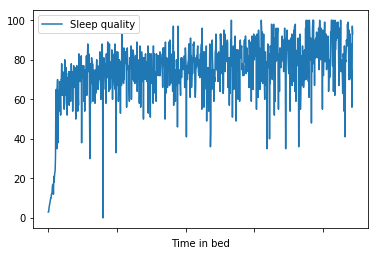

In [26]:
df_=sleep_data.sort_values(by=['elapsed time (s)'])
df_.plot(x='Time in bed',y='Sleep quality')

In [31]:
display(sleep_data.head())
display(sleep_data.dtypes)
summ=sleep_data.describe()
display(summ)
summ.to_csv('summary.txt', header=True, index=True, sep=';', mode='a')

,Start,End,Sleep quality,Time in bed,Activity (steps),HR,elapsed_time,elapsed time (s)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100,8:32,0,59.000000,08:32:24,30744.0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3,0:16,0,72.000000,00:16:04,964.0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98,8:30,0,57.000000,08:30:42,30642.0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65,7:32,0,60.604938,07:32:00,27120.0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72,6:44,0,68.000000,06:44:25,24265.0


Start                datetime64[ns]
End                  datetime64[ns]
Sleep quality                 int32
Time in bed                  object
Activity (steps)              int64
HR                          float64
elapsed_time        timedelta64[ns]
elapsed time (s)            float64
dtype: object

,Sleep quality,Activity (steps),HR,elapsed_time,elapsed time (s)
count,887.000000,887.000000,887.000000,887,887.000000
mean,74.895152,2776.378805,60.604938,0 days 07:39:05.254791,27545.254791
std,15.433292,3486.482157,3.027846,0 days 01:17:28.211587,4648.211587
min,0.000000,0.000000,49.000000,0 days 00:15:05,905.000000
25%,69.000000,0.000000,60.604938,0 days 07:19:29.500000,26369.500000
50%,77.000000,255.000000,60.604938,0 days 07:44:19,27859.000000
75%,84.000000,5317.000000,60.604938,0 days 08:12:51.500000,29571.500000
max,100.000000,21870.000000,98.000000,0 days 10:46:05,38765.000000


In [30]:
test=pd.read_table('summary.txt',sep=';')
display(test)

,Unnamed: 0,Sleep quality,Activity (steps),HR,elapsed_time,elapsed time (s)
0,count,887.000000,887.000000,887.000000,887,887.000000
1,mean,74.895152,2776.378805,60.604938,0 days 07:39:05.254791,27545.254791
2,std,15.433292,3486.482157,3.027846,0 days 01:17:28.211587,4648.211587
3,min,0.000000,0.000000,49.000000,0 days 00:15:05,905.000000
4,25%,69.000000,0.000000,60.604938,0 days 07:19:29.500000,26369.500000
5,50%,77.000000,255.000000,60.604938,0 days 07:44:19,27859.000000
6,75%,84.000000,5317.000000,60.604938,0 days 08:12:51.500000,29571.500000
7,max,100.000000,21870.000000,98.000000,0 days 10:46:05,38765.000000
